In [151]:
from config import *
import pandas as pd

data=pd.read_excel(train_file_path)
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
7993,FDB23,19.20,Regular,0.000000,Starchy Foods,223.8062,OUT045,2002,NaN,Tier 2,Supermarket Type1,5642.6550
7994,NCA29,10.50,Low Fat,0.027276,Household,171.3106,OUT046,1997,Small,Tier 1,Supermarket Type1,3593.3226
7995,FDO20,12.85,Regular,0.152748,Fruits and Vegetables,252.0382,OUT018,2009,Medium,Tier 3,Supermarket Type2,4037.4112
7996,NCH55,NaN,Low Fat,0.060707,Household,127.5020,OUT019,1985,Small,Tier 1,Grocery Store,379.5060


In [152]:
cols=data.columns.to_list()
cat_feats=[]
num_feats=[]
for c in cols:
    if data[c].dtype.name in ['object','category']:
        cat_feats.append(c)
    else:
        num_feats.append(c)
cat_feats
num_feats

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [153]:
from  preprocessing import cleaning_data, data_preprocessing

d_clean=cleaning_data(data)
d_clean

No. of Empty items in Item_Identifier is: 0
No. of Empty items in Item_Weight is: 1374
No. of Empty items in Item_Fat_Content is: 0
No. of Empty items in Item_Visibility is: 0
No. of Empty items in Item_Type is: 0
No. of Empty items in Item_MRP is: 0
No. of Empty items in Outlet_Identifier is: 0
No. of Empty items in Outlet_Establishment_Year is: 0
No. of Empty items in Outlet_Size is: 2261
No. of Empty items in Outlet_Location_Type is: 0
No. of Empty items in Outlet_Type is: 0
No. of Empty items in Item_Outlet_Sales is: 0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
7993,FDB23,19.20000,Regular,0.000000,Starchy Foods,223.8062,OUT045,2002,Medium,Tier 2,Supermarket Type1,5642.6550
7994,NCA29,10.50000,Low Fat,0.027276,Household,171.3106,OUT046,1997,Small,Tier 1,Supermarket Type1,3593.3226
7995,FDO20,12.85000,Regular,0.152748,Fruits and Vegetables,252.0382,OUT018,2009,Medium,Tier 3,Supermarket Type2,4037.4112
7996,NCH55,12.87397,Low Fat,0.060707,Household,127.5020,OUT019,1985,Small,Tier 1,Grocery Store,379.5060


In [154]:
from sklearn.preprocessing import OrdinalEncoder, robust_scale
from sklearn.decomposition import PCA

X=d_clean.drop(columns=['Item_Identifier', 'Item_Outlet_Sales'])
y=d_clean['Item_Outlet_Sales']
oen=OrdinalEncoder()
oen.fit(X)
X_t=oen.transform(X)
X_t=robust_scale(X_t)
pca=PCA(0.75)
pca.fit(X_t)
X_pca=pca.transform(X_t)
X_d=pd.DataFrame(X_pca)

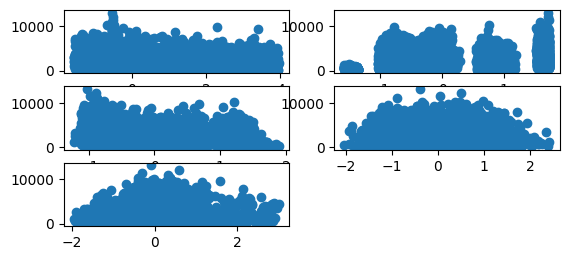

In [155]:
import matplotlib.pyplot as plt


for i,c in enumerate(X_d.columns):
    plt.subplot(5,2,i+1)
    plt.scatter(X_d[c],y)

plt.show()

In [156]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from sklearn.impute import SimpleImputer

def knn_outlier_detection(X, k, threshold):
    """
    Identifies outliers in the dataset using KNN.

    Parameters:
        X (array-like): The data matrix.
        k (int): Number of nearest neighbors to consider.
        threshold (float): The outlier threshold.

    Returns:
        array: A boolean array indicating outliers (True) and inliers (False).
    """

    nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X) 
    distances, _ = nbrs.kneighbors(X)
    outlier_scores = distances[:, k]  # Distance to the kth neighbor
    if threshold is None:
        threshold = np.percentile(outlier_scores, 100)

    print(threshold)
    is_outlier = outlier_scores > threshold
    return is_outlier

def data_preprocessing(x_data,y_data=None):

    print('With Outliers: ',x_data.shape[0])
    cols = x_data.columns.to_list()
    numerical_features = []
    categorical_data = []

    for c in cols:
        if x_data[c].dtype.name in ['object','category']:
            categorical_data.append(c)
        else:
            numerical_features.append(c)
    
    is_outlier = knn_outlier_detection(np.array(x_data[numerical_features]), k=300, threshold=None)
    x_data = x_data[~is_outlier].reset_index(drop=True)
    

    print(f"Dataset size after outlier removal: {x_data.shape[0]}")
    
    x_data = pd.get_dummies(x_data,columns=categorical_data,drop_first=True)
    if y_data is not None:
        y_data = y_data[~is_outlier].reset_index(drop=True)
        return x_data,y_data
    return x_data

def cleaning_data(data):
    for item in data.columns:
        print(f'No. of Empty items in {item} is: {data[item].isnull().sum()}')
    imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
    data.iloc[:,1]=imputer.fit_transform(data.iloc[:,1].values.reshape(-1, 1))
    imputer_string = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    data.iloc[:,8]=imputer_string.fit_transform(data.iloc[:,8].values.reshape(-1, 1))

    # data.to_csv("./cleaned_dataset.csv", index=False) 

    return data

In [157]:
X_or,y_or=data_preprocessing(X_d,y)

With Outliers:  7998
3.148409173728408
Dataset size after outlier removal: 7998


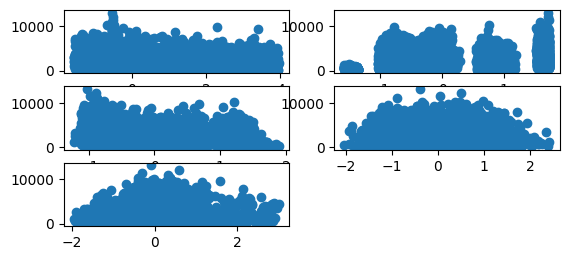

In [158]:
import matplotlib.pyplot as plt


for i,c in enumerate(X_or.columns):
    plt.subplot(5,2,i+1)
    plt.scatter(X_or[c],y_or)

plt.show()

In [159]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_or,y_or)


LinearRegression()

In [160]:
lr.coef_

array([ -53.06162935,  609.45578433, -640.6666313 ,   -5.87920832,
        286.95248449])

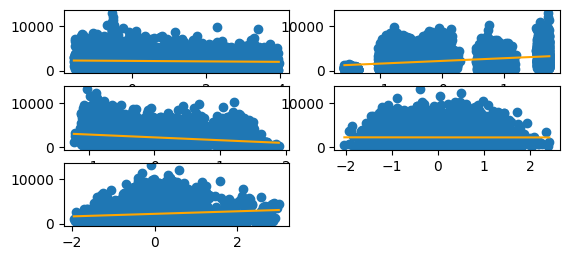

In [161]:
import matplotlib.pyplot as plt


for i,c in enumerate(X_or.columns):
    plt.subplot(5,2,i+1)
    plt.scatter(X_or[c],y_or)
    plt.plot((min(X_or[c]),max(X_or[c])),(lr.coef_[i]*min(X_or[c])+lr.intercept_, lr.coef_[i]*max(X_or[c])+lr.intercept_), color='orange')

plt.show()

In [162]:
import numpy as np

y_pred=lr.predict(X_or)
print(np.mean(np.abs(y_pred-y_or)))

1191.7057831799132


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfc=RandomForestRegressor()
rfc.fit(X_or, y_or)

import numpy as np

y_pred=rfc.predict(X_or)
print(np.sqrt(np.mean(np.abs(y_pred-y_or)**2)))

231233.27315380514
